<a href="https://colab.research.google.com/github/e233826/CNG-562/blob/master/Pakzad_otto_group_product_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
import csv
import random
import numpy  as np
import pandas  as pd

In [60]:
url = 'https://raw.githubusercontent.com/e233826/data-set/master/train.csv'
train = pd.read_csv(url)
train.head(10)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1
5,6,2,1,0,0,7,0,0,0,0,0,0,0,2,0,0,0,6,0,0,2,0,0,0,5,0,0,0,0,1,0,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,5,0,1,0,1,4,2,6,0,2,4,2,0,0,1,0,2,0,4,3,0,0,0,0,1,0,3,0,0,0,0,2,0,0,Class_1
6,7,2,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0,0,0,0,0,0,1,0,2,...,2,0,0,0,0,2,0,1,0,3,1,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,Class_1
7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Class_1
8,9,0,0,0,0,0,0,0,4,0,0,0,1,7,0,0,0,1,0,0,2,0,0,0,7,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,2,0,0,0,0,1,0,2,0,0,0,3,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,Class_1
9,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,Class_1


In [0]:
train.info()

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [61]:
train.replace('[ ]', np.nan, regex=True , inplace=True)
train.isnull().sum()

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
feat_5     0
feat_6     0
feat_7     0
feat_8     0
feat_9     0
feat_10    0
feat_11    0
feat_12    0
feat_13    0
feat_14    0
feat_15    0
feat_16    0
feat_17    0
feat_18    0
feat_19    0
feat_20    0
feat_21    0
feat_22    0
feat_23    0
feat_24    0
feat_25    0
feat_26    0
feat_27    0
feat_28    0
feat_29    0
          ..
feat_65    0
feat_66    0
feat_67    0
feat_68    0
feat_69    0
feat_70    0
feat_71    0
feat_72    0
feat_73    0
feat_74    0
feat_75    0
feat_76    0
feat_77    0
feat_78    0
feat_79    0
feat_80    0
feat_81    0
feat_82    0
feat_83    0
feat_84    0
feat_85    0
feat_86    0
feat_87    0
feat_88    0
feat_89    0
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

In [62]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scaler = StandardScaler()
lbe = LabelEncoder ()
train['target'] = lbe.fit_transform(train['target'])

train.target.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [0]:
target_train = train['target']
train.drop(['target', 'id'], axis=1, inplace=True)

In [64]:
train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,...,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [66]:
target_train.shape


(61878,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target_train, test_size = 0.25)

In [0]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [0]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)                         
predicted_clf = clf.predict(X_test)
metrics.accuracy_score(y_test, predicted_clf)

0.7204912734324499

In [0]:
from sklearn.svm import SVC
SV = SVC()
SV =SV.fit(X_train, y_train)
predicted_SV = SV.predict(X_test)
metrics.accuracy_score(y_test, predicted_SV)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.781060116354234

In [0]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN =KNN.fit(X_train, y_train)
predicted_KNN = KNN.predict(X_test)
metrics.accuracy_score(y_test, predicted_KNN)

0.7727860374919199

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf =clf.fit(X_train, y_train)
predicted_clf = clf.predict(X_test)
metrics.accuracy_score(y_test, predicted_clf)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7731738849385908

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, Y_pred)


0.7676793794440854

In [69]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

roc_target= lb.fit_transform(target_train)

roc_target.shape

(61878, 9)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train, roc_target, test_size = 0.25)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, log_loss, roc_auc_score, auc
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

0.6580478345184227
0.9350613023538629


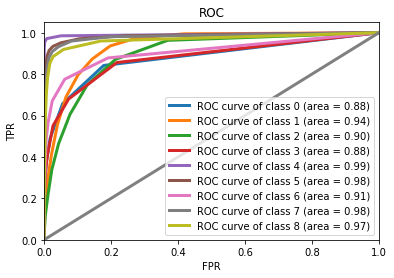

In [78]:


model = RandomForestClassifier()
model = OneVsRestClassifier(model)
model.fit(X_train,y_train)
predict = model.predict(X_test)
predict_prob=model.predict_proba(X_test)    

print (accuracy_score(y_test, predict))

print (roc_auc_score(y_test, predict_prob))


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(roc_target.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], predict_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=3,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='grey', lw=3, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="best")
plt.show()